In [26]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
def f(x):
    return x

In [3]:
interact(f, x=10);

A Jupyter Widget

In [4]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import rcParams

mpl.rcParams['figure.figsize'] = (12,12*0.618)

rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Computer Modern Roman']
# Times-Roman

How are the data files calculates?

In my codebase git repository (codebase/mma/matter)

1. `rabi-single-frequency-for-paper.nb`: is for the first figure, i.e., single frequency with a lot of approximations.
2. `rabi-interference-condition.nb`: is the interference effect. Section Numerical solutions -> For Neutrinos -> Export Data



## Making Plots

### Keep Tracking of Programs

1. Single frequency neutrino and Rabi: rabi2.nb


Data:

1. Single frequency Rabi formula prediction: `theory10List.csv`
2. Neutrino Oscillations with Matter Perturbation: `sol10PList.csv`

## Plots

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

Defining font size etc

In [6]:
ftsz = 22

In [7]:
%%bash
ls single-frequency

paper-single-frequency-simple-a1-0.0001-k1-0.9999.csv
paper-single-frequency-simple-a1-0.0001-k1-0.99998.csv
paper-single-frequency-simple-a1-0.0001-k1-0.99999.csv
paper-single-frequency-simple-a1-0.0001-k1-1.csv
paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.9999.csv
paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99998.csv
paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99999.csv
paper-single-frequency-simple-theory-prob-a1-0.0001-k1-1.csv
rabi-formula-fail


In [8]:
theory10List = np.genfromtxt ('theory10List.csv', delimiter=",")
sol10PList = np.genfromtxt ('sol10PList.csv', delimiter=",")

theory1List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.9999.csv', delimiter=",") )

theory2List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99998.csv', delimiter=",") )

theory3List = np.transpose(  np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99999.csv', delimiter=",") )

theory4List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-1.csv', delimiter=",") )


sol1List = np.transpose(  np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.9999.csv', delimiter=",") )

sol2List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.99998.csv', delimiter=",") )

sol3List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.99999.csv', delimiter=",") )

sol4List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-1.csv', delimiter=",") )


theory1ListFail = np.transpose( np.genfromtxt( 'single-frequency/rabi-formula-fail/paper-single-frequency-simple-theory-prob-a1-0.005-k1-0.5.csv', delimiter=",") )
sol1ListFail = np.transpose(  np.genfromtxt( 'single-frequency/rabi-formula-fail/paper-single-frequency-simple-a1-0.005-k1-0.5.csv', delimiter=",") )

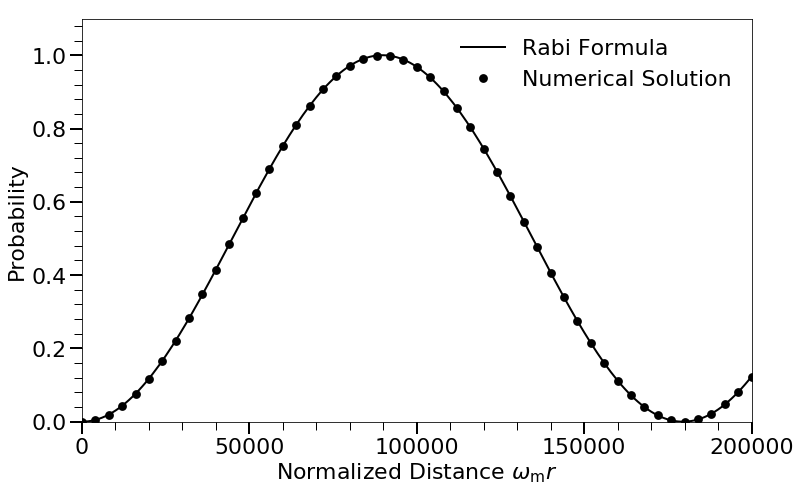

In [9]:
singleFrequencyplt, singleFrequencyax = plt.subplots()

singleFrequencyplt = plt.plot(theory10List[0],theory10List[1],'k-',sol10PList[0][0::4],sol10PList[1][0::4],'ko', markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.1])
plt.xlim([0,200000])
#plt.xlim([0,375000])
plt.legend(['Rabi Formula','Numerical Solution'], fontsize=ftsz,frameon=False,loc=1)

singleFrequencyax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
singleFrequencyax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

singleFrequencymajorLocator = MultipleLocator(50000)
singleFrequencymajorFormatter = FormatStrFormatter('%d')
singleFrequencyminorLocator = MultipleLocator(10000)

singleFrequencymajorLocatory = MultipleLocator(0.2)
singleFrequencymajorFormattery = FormatStrFormatter('%0.1f')
singleFrequencyminorLocatory = MultipleLocator(0.04)


singleFrequencyax.xaxis.set_major_locator(singleFrequencymajorLocator)
singleFrequencyax.xaxis.set_major_formatter(singleFrequencymajorFormatter)

singleFrequencyax.yaxis.set_major_locator(singleFrequencymajorLocatory)
singleFrequencyax.yaxis.set_major_formatter(singleFrequencymajorFormattery)


# for the minor ticks, use no labels; default NullFormatter
singleFrequencyax.xaxis.set_minor_locator(singleFrequencyminorLocator)
singleFrequencyax.yaxis.set_minor_locator(singleFrequencyminorLocatory)

plt.savefig('rabiOscillationsNeutrinoCoincidence-single-frequency-1.pdf',bbox_inches='tight')

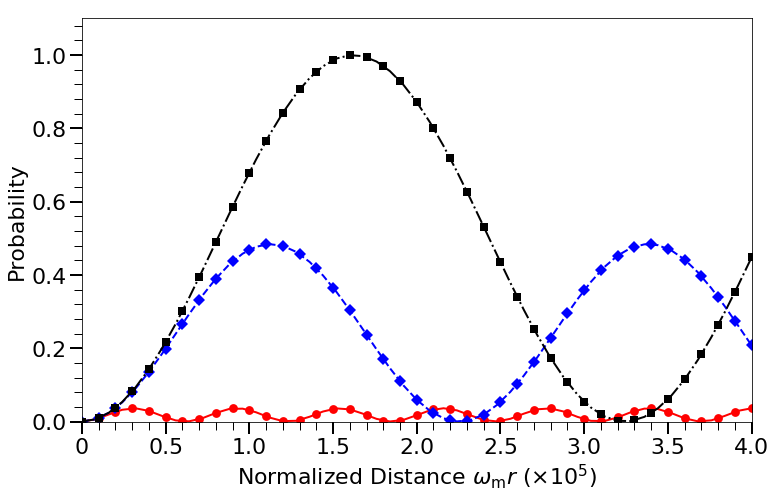

In [10]:
singleFrequencyplt, singleFrequencyax = plt.subplots()

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

sfps = 10
singleFrequencyplt = plt.plot(theory1List[0],theory1List[1],'r-',sol1List[0][0::sfps],sol1List[1][0::sfps],'ro',\
                              theory2List[0],theory2List[1],'b--',sol2List[0][0::sfps],sol2List[1][0::sfps],'bD',\
#                              theory3List[0],theory3List[1],'m:',sol3List[0][0::sfps],sol3List[1][0::sfps],'m^',\
                              theory4List[0],theory4List[1],'k-.',sol4List[0][0::sfps],sol4List[1][0::sfps],'ks',\
                              markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times10^5$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.1])
plt.xlim([0,400000])
#plt.xlim([0,375000])
# plt.legend(['Rabi Formula','Numerical Solution'], fontsize=ftsz,frameon=False,loc=1)

singleFrequencyax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
singleFrequencyax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

singleFrequencymajorLocator = MultipleLocator(50000)
singleFrequencymajorFormatter = FormatStrFormatter('%d')
singleFrequencyminorLocator = MultipleLocator(10000)

singleFrequencymajorLocatory = MultipleLocator(0.2)
singleFrequencymajorFormattery = FormatStrFormatter('%0.1f')
singleFrequencyminorLocatory = MultipleLocator(0.04)


singleFrequencyax.xaxis.set_major_locator(singleFrequencymajorLocator)
singleFrequencyax.xaxis.set_major_formatter(singleFrequencymajorFormatter)

singleFrequencyax.yaxis.set_major_locator(singleFrequencymajorLocatory)
singleFrequencyax.yaxis.set_major_formatter(singleFrequencymajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
singleFrequencyxlabels = ['', '0','0.5','1.0','1.5','2.0', '2.5', '3.0', '3.5', '4.0']
singleFrequencyax.set_xticklabels(singleFrequencyxlabels)

# for the minor ticks, use no labels; default NullFormatter
singleFrequencyax.xaxis.set_minor_locator(singleFrequencyminorLocator)
singleFrequencyax.yaxis.set_minor_locator(singleFrequencyminorLocatory)

plt.savefig('rabiOscillationsNeutrinoCoincidence-single-frequency.pdf',bbox_inches='tight')

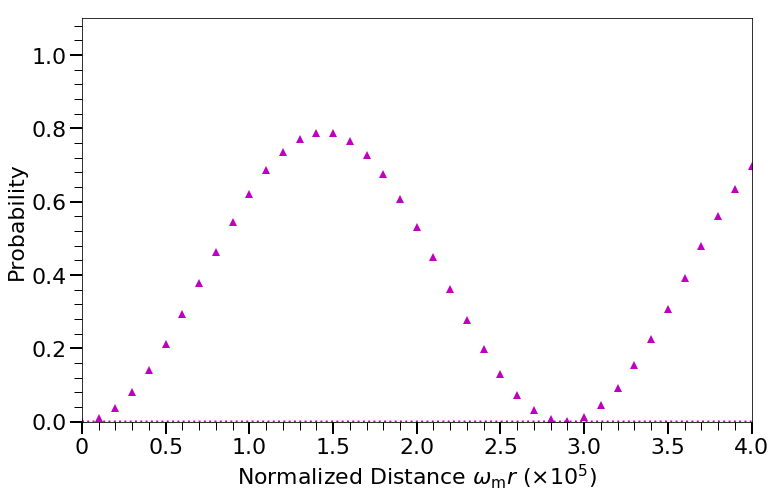

In [11]:
singleFrequencyplt, singleFrequencyax = plt.subplots()

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

sfps = 10
singleFrequencyplt = plt.plot(theory1ListFail[0],theory1ListFail[1],'m:',sol3List[0][0::sfps],sol3List[1][0::sfps],'m^',\
#                               theory2List[0],theory2List[1],'b--',sol2List[0][0::sfps],sol2List[1][0::sfps],'bD',\
#                              theory1List[0],theory1List[1],'r-',sol1List[0][0::sfps],sol1List[1][0::sfps],'ro',\
#                               theory4List[0],theory4List[1],'k-.',sol4List[0][0::sfps],sol4List[1][0::sfps],'ks',\
                              markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times10^5$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.1])
plt.xlim([0,400000])
#plt.xlim([0,375000])
# plt.legend(['Rabi Formula','Numerical Solution'], fontsize=ftsz,frameon=False,loc=1)

singleFrequencyax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
singleFrequencyax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

singleFrequencymajorLocator = MultipleLocator(50000)
singleFrequencymajorFormatter = FormatStrFormatter('%d')
singleFrequencyminorLocator = MultipleLocator(10000)

singleFrequencymajorLocatory = MultipleLocator(0.2)
singleFrequencymajorFormattery = FormatStrFormatter('%0.1f')
singleFrequencyminorLocatory = MultipleLocator(0.04)


singleFrequencyax.xaxis.set_major_locator(singleFrequencymajorLocator)
singleFrequencyax.xaxis.set_major_formatter(singleFrequencymajorFormatter)

singleFrequencyax.yaxis.set_major_locator(singleFrequencymajorLocatory)
singleFrequencyax.yaxis.set_major_formatter(singleFrequencymajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
singleFrequencyxlabels = ['', '0','0.5','1.0','1.5','2.0', '2.5', '3.0', '3.5', '4.0']
singleFrequencyax.set_xticklabels(singleFrequencyxlabels)

# for the minor ticks, use no labels; default NullFormatter
singleFrequencyax.xaxis.set_minor_locator(singleFrequencyminorLocator)
singleFrequencyax.yaxis.set_minor_locator(singleFrequencyminorLocatory)

plt.savefig('rabiOscillationsNeutrinoCoincidence-single-frequency-rabi-formula-fail.pdf',bbox_inches='tight')

In [12]:
def qvalue(a,k):
    return abs(k-1)/a

In [13]:
print(\
    qvalue(0.0001,1), qvalue(0.0001,1-0.00001), qvalue(0.0001,1-0.00002),qvalue(0.0001,1-0.0001)\
)

0.0 0.0999999999995449 0.20000000000020002 0.9999999999998899


## Plot 2

In [51]:
%%bash
tree castle-wall

castle-wall
├── probAkhmedovRabiTheory3List-0.4.csv
├── probAkhmedovRabiTheoryList-0.003Pi.csv
├── probAkhmedovRabiTheoryList-0.02.csv
├── probAkhmedovRabiTheoryList-0.03Pi.csv
├── probAkhmedovRabiTheoryList-0.04.csv
├── probAkhmedovRabiTheoryList-0.08.csv
├── probAkhmedovRabiTheoryList-0.1.csv
├── probAkhmedovRabiTheoryList-0.2.csv
├── probAkhmedovRabiTheoryList-0.4.csv
├── probAkhmedovRabiTheoryList-0.5.csv
├── probAkhmedovRabiTheoryList-0.6.csv
├── probAkhmedovRabiTheoryList-0.8.csv
├── probAkhmedovRabiTheoryList-1..csv
├── probAkhmedovRabiTheoryList-3\ Pi.csv
├── probAkhmedovRabiTheoryList-3.0649052682562883Pi.csv
├── probAkhmedovRabiTheoryList-3.065Pi.csv
├── probAkhmedovRabiTheoryList-3Pi-divied-by-2.csv
├── probAkhmedovRabiTheoryList-3Pi.csv
├── probAkhmedovRabiTheoryList-4Pi.csv
├── probAkhmedovRabiTheoryList-Pi-divied-by-250.csv
├── solAkhList-0.003Pi.csv
├── solAkhList-0.02.csv
├── solAkhList-0.03Pi.csv
├── solAkhList-0.04.csv
├── solAkhList-0.08.csv
├── solAkhList-0.1.csv
├─

```
\delta m^2=  2.6e-15MeV^2
\theta_v=0.155 ==== \sin^2(2\theta_v)=0.093
E=10MeV
```

In [56]:
## Data for $\lambda_2-\lambda_1 = 1*\lambda_0$
solAkhList1p0 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-1..csv', delimiter=",") )
probAkhmedovRabiTheoryList1p0 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-1..csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.8*\lambda_0$
solAkhList0p8 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.8.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p8 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.8.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.6*\lambda_0$
solAkhList0p6 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.6.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p6 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.6.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.4*\lambda_0$
solAkhList0p4 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.4.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p4 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.4.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.2*\lambda_0$
solAkhList0p2 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.2.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p2 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.2.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.1*\lambda_0$
solAkhList0p1 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.1.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p1 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.1.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.04*\lambda_0$
solAkhList0p04 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.04.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p04 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.04.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.02*\lambda_0$
solAkhList0p02 = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.02.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p02 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.02.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.003Pi*\lambda_0$ which is the value we expect the resonance to have significant interference.
# Q = 0.001
solAkhList0p003Pi = np.transpose( np.genfromtxt ('castle-wall/solAkhList-0.003Pi.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p003Pi = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.003Pi.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 3.065Pi*\lambda_0$ which is the value we expect the resonance to have significant interference.
# Q = 1
solAkhList3p065Pi = np.transpose( np.genfromtxt ('castle-wall/solAkhList-3.065Pi.csv', delimiter=",") )
probAkhmedovRabiTheoryList3p065Pi = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-3.065Pi.csv', delimiter=",") )


(0, 600)

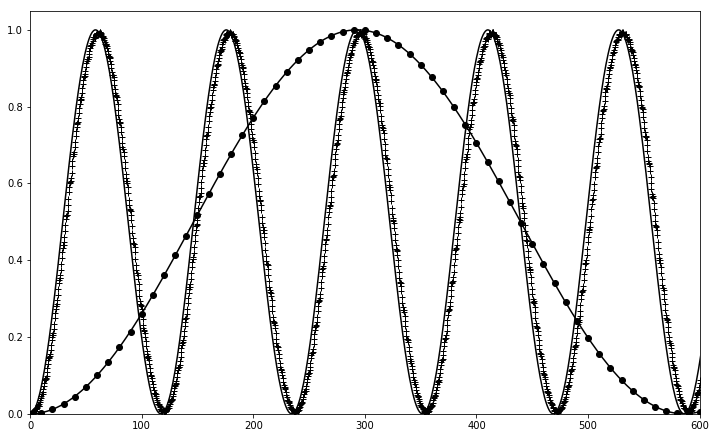

In [16]:
plt.plot(solAkhList0p2[0][0::4],solAkhList0p2[1][0::4],'k+',probAkhmedovRabiTheoryList0p2[0],probAkhmedovRabiTheoryList0p2[1],'k-')
plt.ylim([0,1.05])
plt.xlim([0,300])

plt.plot(solAkhList0p04[0][0::100],solAkhList0p04[1][0::100],'ko',probAkhmedovRabiTheoryList0p04[0],probAkhmedovRabiTheoryList0p04[1],'k-')
plt.ylim([0,1.05])
plt.xlim([0,600])


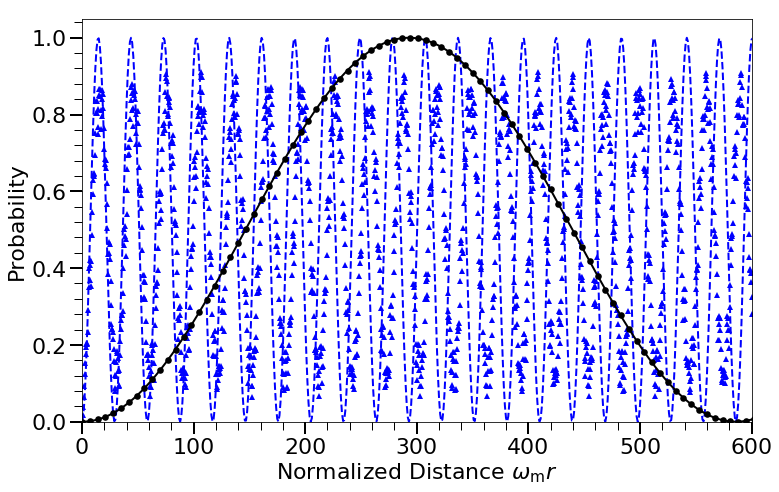

In [17]:
castlewallplt, castlewallax = plt.subplots()

castlewallplt = plt.plot(probAkhmedovRabiTheoryList0p8[0],probAkhmedovRabiTheoryList0p8[1],'b--',\
                         solAkhList0p8[0][0::4],solAkhList0p8[1][0::4],'b^', \
                         probAkhmedovRabiTheoryList0p04[0],probAkhmedovRabiTheoryList0p04[1],'k-',\
                         solAkhList0p04[0][0::70], solAkhList0p04[1][0::70],'ko',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,600])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

castlewallax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
castlewallax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

castlewallmajorLocator = MultipleLocator(100)
castlewallmajorFormatter = FormatStrFormatter('%d')
castlewallminorLocator = MultipleLocator(20)

castlewallmajorLocatory = MultipleLocator(0.2)
castlewallmajorFormattery = FormatStrFormatter('%0.1f')
castlewallminorLocatory = MultipleLocator(0.04)

castlewallax.xaxis.set_major_locator(castlewallmajorLocator)
castlewallax.xaxis.set_major_formatter(castlewallmajorFormatter)

castlewallax.yaxis.set_major_locator(castlewallmajorLocatory)
castlewallax.yaxis.set_major_formatter(castlewallmajorFormattery)


# for the minor ticks, use no labels; default NullFormatter
castlewallax.xaxis.set_minor_locator(castlewallminorLocator)
castlewallax.yaxis.set_minor_locator(castlewallminorLocatory)

plt.savefig('castle-wall.pdf',bbox_inches='tight')

The seperate plots:

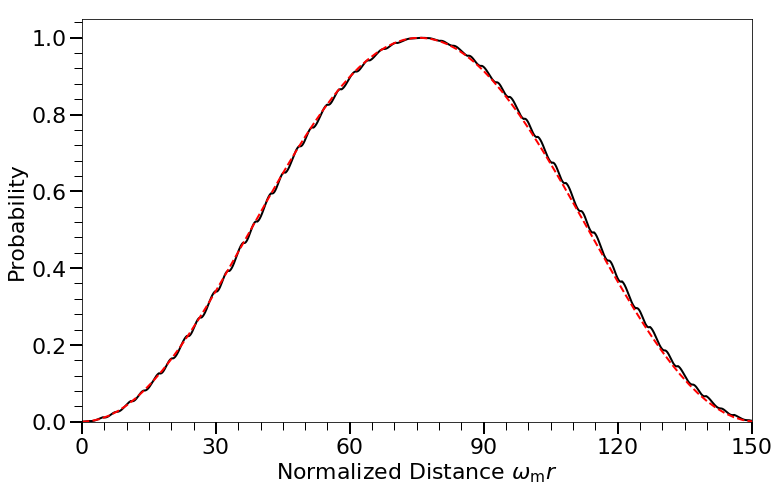

In [70]:
castlewallplt1, castlewallax1 = plt.subplots()

castlewallplt1 = plt.plot(#probAkhmedovRabiTheoryList0p4[0],probAkhmedovRabiTheoryList0p4[1],'k-',\
                         solAkhList0p4[0][0::2],solAkhList0p4[1][0::2],'k-', \
                        probAkhmedovRabiTheoryList0p4[0][0::2],probAkhmedovRabiTheoryList0p4[1][0::2],'r--',\
#                         solAkhList0p04[0][0::70], solAkhList0p04[1][0::70],'ko',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,150])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

castlewallax1.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
castlewallax1.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

castlewall1majorLocator = MultipleLocator(30)
castlewall1majorFormatter = FormatStrFormatter('%d')
castlewall1minorLocator = MultipleLocator(5)

castlewall1majorLocatory = MultipleLocator(0.2)
castlewall1majorFormattery = FormatStrFormatter('%0.1f')
castlewall1minorLocatory = MultipleLocator(0.04)

castlewallax1.xaxis.set_major_locator(castlewall1majorLocator)
castlewallax1.xaxis.set_major_formatter(castlewall1majorFormatter)

castlewallax1.yaxis.set_major_locator(castlewall1majorLocatory)
castlewallax1.yaxis.set_major_formatter(castlewall1majorFormattery)

# for the minor ticks, use no labels; default NullFormatter
castlewallax1.xaxis.set_minor_locator(castlewall1minorLocator)
castlewallax1.yaxis.set_minor_locator(castlewall1minorLocatory)

plt.savefig('castle-wall-1.pdf',bbox_inches='tight')

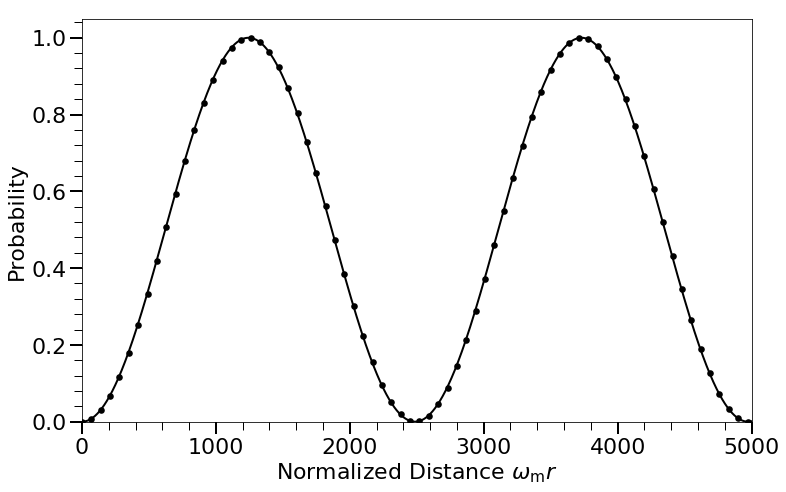

In [66]:
castlewallplt2, castlewallax2 = plt.subplots()

castlewallplt2 = plt.plot(#probAkhmedovRabiTheoryList0p8[0],probAkhmedovRabiTheoryList0p8[1],'b--',\
                         #solAkhList0p8[0][0::4],solAkhList0p8[1][0::4],'b^', \
                         probAkhmedovRabiTheoryList0p003Pi[0],probAkhmedovRabiTheoryList0p003Pi[1],'k-',\
                         solAkhList0p003Pi[0][0::70], solAkhList0p003Pi[1][0::70],'ko',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,5000])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

castlewallax2.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
castlewallax2.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

castlewall2majorLocator = MultipleLocator(1000)
castlewall2majorFormatter = FormatStrFormatter('%d')
castlewall2minorLocator = MultipleLocator(200)

castlewall2majorLocatory = MultipleLocator(0.2)
castlewall2majorFormattery = FormatStrFormatter('%0.1f')
castlewall2minorLocatory = MultipleLocator(0.04)


castlewallax2.xaxis.set_major_locator(castlewall2majorLocator)
castlewallax2.xaxis.set_major_formatter(castlewall2majorFormatter)

castlewallax2.yaxis.set_major_locator(castlewall2majorLocatory)
castlewallax2.yaxis.set_major_formatter(castlewall2majorFormattery)


# for the minor ticks, use no labels; default NullFormatter
castlewallax2.xaxis.set_minor_locator(castlewall2minorLocator)
castlewallax2.yaxis.set_minor_locator(castlewall2minorLocatory)

plt.savefig('castle-wall-2.pdf',bbox_inches='tight')

Plot of the profile

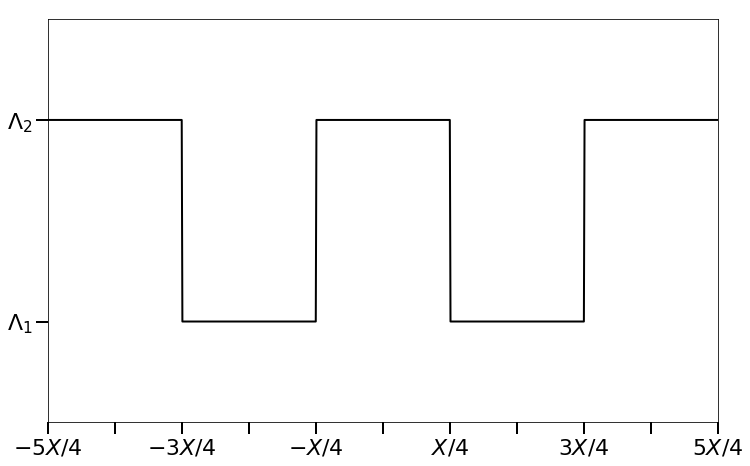

In [20]:
cwprofilex = np.linspace(-5, 5, 1000)

def cwprofile(x):
    conds = [ x<-3 ,(x >= -3) & (x < -1), (x >= -1) & (x < 1), (x >= 1) & (x < 3), x >= 3]
    funcs = [ 2, 1,2,1,2 ]
    
    return np.piecewise(x, conds, funcs)


castleprofile, castleprofileax = plt.subplots()

plt.plot(cwprofilex, cwprofile(cwprofilex), 'k-', linewidth=2)
plt.xlim([-5,5])
plt.ylim([0.5,2.5])

castleprofileax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
castleprofileax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

castleprofilemajorLocator = MultipleLocator(1)
castleprofilemajorFormatter = FormatStrFormatter('%.2e')
#castleprofileminorLocator = MultipleLocator(1)

castleprofilemajorLocatory = MultipleLocator(1)
castleprofilemajorFormattery = FormatStrFormatter('%0.1f')
#interferenceminorLocatory = MultipleLocator(0.5)


castleprofileax.xaxis.set_major_locator(castleprofilemajorLocator)
castleprofileax.xaxis.set_major_formatter(castleprofilemajorFormatter)

castleprofileax.yaxis.set_major_locator(castleprofilemajorLocatory)
castleprofileax.yaxis.set_major_formatter(castleprofilemajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
cwprofilexlabels = ['', '$-5X/4$','','$-3X/4$','','$-X/4$', '', '$X/4$', '', '$3X/4$', '', '$5X/4$']
castleprofileax.set_xticklabels(cwprofilexlabels)

cwprofileylabels = ['', '$\Lambda_1$', '$\Lambda_2$' ]
castleprofileax.set_yticklabels(cwprofileylabels)


# for the minor ticks, use no labels; default NullFormatter
# castleprofileax.xaxis.set_minor_locator(castleprofileminorLocator)
# castleprofilexax.yaxis.set_minor_locator(castleprofileminorLocatory)

plt.savefig('castlewall-profile.pdf',bbox_inches='tight')

## Interferences

The data is generated using Mathematica notebook `codebase/mma/rabi2.nb`.

```
a1=0.000035
k1=1
a2=1/100
k2=0.1
k2P=0.01
a2Critical = Sqrt[2 (a1 + k1 - 1)];
a2PureRabi = N@{a2*2, a2*3}


dellamSlowCriticalSin[x_] := a2Critical Sin[k2P x]
dellamSlowCriticalCos[x_] := a2Critical Cos[k2P x]

dellamCoordSin[x_] := a1 Sin[k1 x]/Sin[2 thetam]*2;
dellamCoordCos[x_] := a1 Cos[k1 x]/Sin[2 thetam]*2;

dellamSin[x_]:= a1 Sin[k1 x];
dellamCos[x_] := a1 Cos[k1 x];

dellamPureRabiSin[x_] := a2 Sin[k2P x];
dellamPureRabiCos[x_] := a2 Cos[k2P x];

dellamPureRabi1Sin[x_] := a2PureRabi[[1]] Sin[k2P x]
dellamPureRabi1Cos[x_] := a2PureRabi[[1]] Cos[k2P x]


sol10List: H=-PauliMatrix[3]/2 - (dellamCos[x]) PauliMatrix[1]/2 + (dellamSin[x]) PauliMatrix[2]/2

sol11List: H = -PauliMatrix[3]/2 - (dellamCos[x] + dellamPureRabiCos[x]) PauliMatrix[1]/2 + (dellamSin[x] + dellamPureRabiSin[x]) PauliMatrix[2]/2

sol12List: H = -PauliMatrix[3]/2 - (dellamCos[x] + dellamPureRabi1Cos[x]) PauliMatrix[1]/2 + (dellamSin[x] + dellamPureRabi1Sin[x]) PauliMatrix[2]/2


sol15Critical: H=-PauliMatrix[3]/2 - (dellamCos[x] + dellamSlowCriticalCos[x]) PauliMatrix[1]/2 + (dellamSin[x] + dellamSlowCriticalSin[x]) PauliMatrix[2]/2

```


In [21]:
%%bash
tree interference

interference
├── interference-three-modes-interferencePyGridLines.csv
├── interference-three-modes-interferencePyUpperFrameTicks.csv
├── interference1-three-modes-k1-1-k2-0.1-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-k1-1-k2-1oPi-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.000035-a2-0.0083666.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.0001-a2-0.0141421.csv
├── interference2-three-modes-k1-1-k2-0.0001-a1-0.0001-a2-0.01.csv
├── interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.000035-a2-0.0083666.csv
├── interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.0001-a2-0.0141421.csv
├── interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.01.csv
├── interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.0141421.csv
├── interference3-three-modes-k1-1-k2-0.0001-k3-1o1000Pi-a1-0.0001-a2-0.01-a3-0.01.csv
├── interference3-three-modes-k1-1-k2-1o10000Pi-k3-1o5432-a1-0.000035-a2-0.0083

In [22]:
## 
sol10 = np.transpose( np.genfromtxt ('interference/sol10List-a1-0.000035-k1-1.csv', delimiter=",") )
theory10 = np.transpose( np.genfromtxt ('interference/theory10List-a1-0.000035-k1-1.csv', delimiter=",") )

## 
sol11 = np.transpose( np.genfromtxt ('interference/sol11List-a1-a2-0.000035-0.01-k1-k2-1-0.01.csv', delimiter=",") )
theory11 = np.transpose( np.genfromtxt ('interference/theory11List-a1-a2-0.000035-0.01-k1-k2-1-0.01.csv', delimiter=",") )

## 
# sol12 = np.transpose( np.genfromtxt ('interference/sol12List-a1-a2-0.000035-0.00035-k1-k2-1-0.01.csv', delimiter=",") )
# theory12 = np.transpose( np.genfromtxt ('interference/theory12List-a1-a2-0.000035-0.00035-k1-k2-1-0.01.csv', delimiter=",") )

# sol12 = np.transpose( np.genfromtxt ('interference/sol12List-a1-a2-0.000035-0.000264575-k1-k2-1-0.01.csv', delimiter=",") )
# theory12 = np.transpose( np.genfromtxt ('interference/theory12List-a1-a2-0.000035-0.000264575-k1-k2-1-0.01.csv', delimiter=",") )

sol12 = np.transpose( np.genfromtxt ('interference/sol12List-a1-a2-0.0001-0.000447214-k1-k2-1-0.01.csv', delimiter=",") )
theory12 = np.transpose( np.genfromtxt ('interference/theory12List-a1-a2-0.0001-0.000447214-k1-k2-1-0.01.csv', delimiter=",") )


##
# sol15Crit = np.transpose( np.genfromtxt ('interference/sol15List-a2-0.0083666-k2-0.01.csv', delimiter=",") )
# theory15Crit = np.transpose( np.genfromtxt ('interference/theory15List-a2-0.0083666-k2-0.01.csv', delimiter=",") )

sol15Crit = np.transpose( np.genfromtxt ('interference/sol15List-a2-0.0141421-k2-0.01.csv', delimiter=",") )
theory15Crit = np.transpose( np.genfromtxt ('interference/theory15List-a2-0.0141421-k2-0.01.csv', delimiter=",") )


## 
# sol14 = np.transpose( np.genfromtxt ('interference/sol14List-a1-a2-0.000035-0.015-k1-k2-1-0.01.csv', delimiter=",") )
# theory14 = np.transpose( np.genfromtxt ('interference/theory14List-a1-a2-0.000035-0.015-k1-k2-1-0.01.csv', delimiter=",") )

# sol14 = np.transpose( np.genfromtxt ('interference/sol14List-a1-a2-0.000035-0.0144914-k1-k2-1-0.01.csv', delimiter=",") )
# theory14 = np.transpose( np.genfromtxt ('interference/theory14List-a1-a2-0.000035-0.0144914-k1-k2-1-0.01.csv', delimiter=",") )

sol14 = np.transpose( np.genfromtxt ('interference/sol14List-a1-a2-0.0001-0.0244949-k1-k2-1-0.01.csv', delimiter=",") )
theory14 = np.transpose( np.genfromtxt ('interference/theory14List-a1-a2-0.0001-0.0244949-k1-k2-1-0.01.csv', delimiter=",") )


OSError: interference/sol10List-a1-0.000035-k1-1.csv not found.

NameError: name 'sol12' is not defined

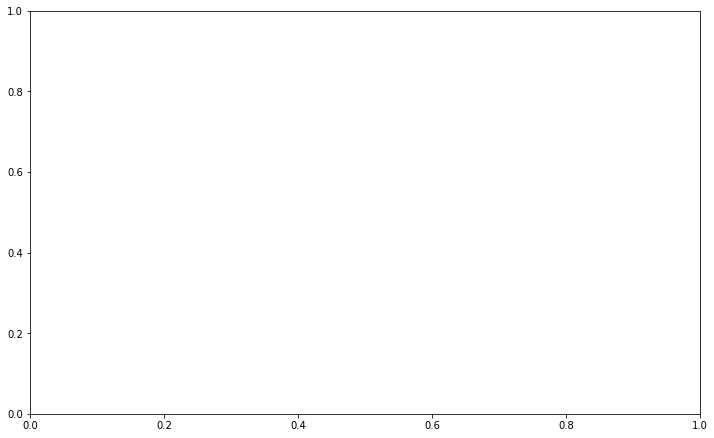

In [35]:
interference, interferenceax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

interferenceplt = plt.plot(sol12[0][0::5],sol12[1][0::5],'ko',\
                         theory12[0],theory12[1],'k-', \
                         sol14[0][0::5],sol14[1][0::5],'rD',\
                         theory14[0],theory14[1],'r--', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
                         sol15Crit[0][0::5],sol15Crit[1][0::5],'g^',\
                         theory15Crit[0], theory15Crit[1],'g-.',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
#plt.xlim([0,380000])
plt.xlim([0,130000])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

interferenceax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
interferenceax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

interferencemajorLocator = MultipleLocator(20000)
interferencemajorFormatter = FormatStrFormatter('%.2e')
interferenceminorLocator = MultipleLocator(2000)

interferencemajorLocatory = MultipleLocator(0.2)
interferencemajorFormattery = FormatStrFormatter('%0.1f')
interferenceminorLocatory = MultipleLocator(0.04)


interferenceax.xaxis.set_major_locator(interferencemajorLocator)
interferenceax.xaxis.set_major_formatter(interferencemajorFormatter)

interferenceax.yaxis.set_major_locator(interferencemajorLocatory)
interferenceax.yaxis.set_major_formatter(interferencemajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
interferencexlabels = ['', '0','2','4','6', '8','10','12']
interferenceax.set_xticklabels(interferencexlabels)

# for the minor ticks, use no labels; default NullFormatter
interferenceax.xaxis.set_minor_locator(interferenceminorLocator)
interferenceax.yaxis.set_minor_locator(interferenceminorLocatory)

plt.savefig('interference-reduction.pdf',bbox_inches='tight')

In [36]:
papersol1=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.01-k1-k2-1.-0.1.csv', delimiter=",") )
papersol2=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.01-k1-k2-1.-10..csv', delimiter=",") )
papersol3=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.05-k1-k2-1.-0.1.csv', delimiter=",") )
papersol4=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.05-k1-k2-1.-10..csv', delimiter=",") )
papersolgridlines=np.genfromtxt('interference/paper-interference-theory-amplitude-20170318.csv', delimiter=",")[:4]

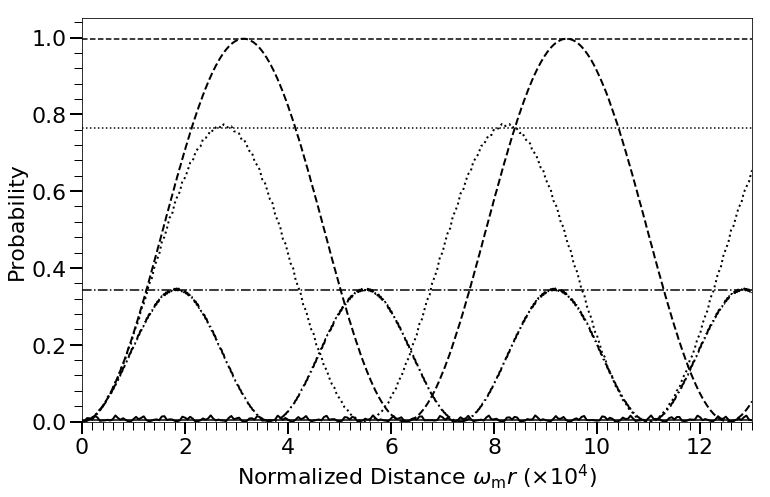

In [37]:
interference, interferenceax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

interferenceplt = plt.plot(\
                         papersol1[0][0::5],papersol1[1][0::5],'k:',\
                         papersol2[0],papersol2[1],'k--', \
                         papersol3[0][0::5],papersol3[1][0::5],'k-',\
                         papersol4[0], papersol4[1],'k-.', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'g^',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
#plt.xlim([0,380000])
plt.xlim([0,130000])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

interferenceax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
interferenceax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

interferencemajorLocator = MultipleLocator(20000)
interferencemajorFormatter = FormatStrFormatter('%.2e')
interferenceminorLocator = MultipleLocator(2000)

interferencemajorLocatory = MultipleLocator(0.2)
interferencemajorFormattery = FormatStrFormatter('%0.1f')
interferenceminorLocatory = MultipleLocator(0.04)


interferenceax.xaxis.set_major_locator(interferencemajorLocator)
interferenceax.xaxis.set_major_formatter(interferencemajorFormatter)

interferenceax.yaxis.set_major_locator(interferencemajorLocatory)
interferenceax.yaxis.set_major_formatter(interferencemajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
interferencexlabels = ['', '0','2','4','6', '8','10','12']
interferenceax.set_xticklabels(interferencexlabels)

# for the minor ticks, use no labels; default NullFormatter
interferenceax.xaxis.set_minor_locator(interferenceminorLocator)
interferenceax.yaxis.set_minor_locator(interferenceminorLocatory)


interferenceax.axhline(papersolgridlines[0], linestyle=':', color='k')
interferenceax.axhline(papersolgridlines[1], linestyle='--', color='k')
interferenceax.axhline(papersolgridlines[2], linestyle='-', color='k')
interferenceax.axhline(papersolgridlines[3], linestyle='-.', color='k')


plt.savefig('interference-reduction.pdf',bbox_inches='tight')

We can calculate the Q values for each lines.

In [38]:
qvalue1 = 0.00035**2/(2*0.000035)
qvalue2 = 0.0083666**2/(2*0.000035)
qvalue3 = 0.015**2/(2*0.000035)

print(qvalue1, qvalue2, qvalue3)

0.00175 0.9999999365714287 3.2142857142857144


## Interference More

Data produced by `destruction-as-energy-gap-shift.nb`

In [29]:
%%bash
tree interference

interference
├── interference-three-modes-interferencePyGridLines.csv
├── interference-three-modes-interferencePyUpperFrameTicks.csv
├── interference1-three-modes-k1-1-k2-0.1-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-k1-1-k2-1oPi-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.000035-a2-0.0083666.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.0001-a2-0.01.csv
├── interference1-three-modes-ks1-1-k2-1oPi-a1-0.0001-a2-0.0141421.csv
├── interference2-three-modes-k1-1-k2-0.0001-a1-0.0001-a2-0.01.csv
├── interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.000035-a2-0.0083666.csv
├── interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.0001-a2-0.0141421.csv
├── interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.01.csv
├── interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.0141421.csv
├── interference3-three-modes-k1-1-k2-0.0001-k3-1o1000Pi-a1-0.0001-a2-0.01-a3-0.01.csv
├── interference3-three-modes-k1-1-k2-1o10000Pi-k3-1o5432-a1-0.000035-a2-0.0083

```
kListKK3NumLimit = {1, {1/(Pi), 1/(10000 Pi)}, 1/(5432 Pi)};
aListKK3NumLimit = {0.000035, {a2FromQ[0.000035, 1], 
    a2FromQ[0.000035, 1]}, a2FromQ[0.000035, 1]};
```

`interference1-three-modes-ks1-1-k2-1oPi-a1-0.000035-a2-0.0083666.csv` for `k1=1` `k2=1/(Pi)`

`interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.000035-a2-0.0083666.csv` for  `k1=1` `k2=1/(10000 Pi)`

`interference3-three-modes-k1-1-k2-1o10000Pi-k3-1o5432-a1-0.000035-a2-0.0083666-a3-0.0083666.csv` for all three with the second `k2`

In [30]:
## for a1=0.000035
# solinter3modes1 = np.transpose( np.genfromtxt ('interference/interference1-three-modes-ks1-1-k2-1oPi-a1-0.000035-a2-0.0083666.csv', delimiter=",") )

# solinter3modes2 = np.transpose( np.genfromtxt ('interference/interference2-three-modes-k1-1-k2-1o10000Pi-a1-0.000035-a2-0.0083666.csv', delimiter=",") )

# solinter3modes3 = np.transpose( np.genfromtxt ('interference/interference3-three-modes-k1-1-k2-1o10000Pi-k3-1o5432-a1-0.000035-a2-0.0083666-a3-0.0083666.csv', delimiter=",") )

## for a1 = 0.0001

solinter3modes1 = np.transpose( np.genfromtxt ('interference/interference1-three-modes-k1-1-k2-0.1-a1-0.0001-a2-0.01.csv', delimiter=",") )

solinter3modesRabi0 = np.transpose( np.genfromtxt ('interference/rabi-interference1-three-modes-k1-1-a1-0.0001.csv', delimiter=",") )

# with k2= 1/1000Pi
solinter3modes2 = np.transpose( np.genfromtxt ('interference/interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.01.csv', delimiter=",") )

solinter3modesRabi2 = np.transpose( np.genfromtxt ('interference/rabi-interference2-three-modes-k1-1-k2-1o1000Pi-a1-0.0001-a2-0.05.csv', delimiter=",") )

# with k2= 1/1000Pi and k3 = 1/543Pi
solinter3modes3 = np.transpose( np.genfromtxt ('interference/interference3-three-modes-k1-1-k2-1o1000Pi-k3-1o543-a1-0.0001-a2-0.01-a3-0.01.csv', delimiter=",") )
solinter3modesRabi3 = np.transpose( np.genfromtxt ('interference/rabi-interference3-three-modes-k1-1-k2-1o1000Pi-k3-1o543-a1-0.0001-a2-0.05-a3-0.05.csv', delimiter=",") )

## Ticks as km distance to be put on the top axis

solinter3modesTicks = np.transpose( np.genfromtxt ('interference/interference-three-modes-interferencePyUpperFrameTicks.csv', delimiter=",") )

## Gridlines that marks the zero points of the second profile

solinter3modesGridLines = np.transpose( np.genfromtxt ('interference/interference-three-modes-interferencePyGridLines.csv', delimiter=",") )
solinter3modesGridLinesRabi = np.transpose( np.genfromtxt ('interference/rabi-interference-three-modes-interferencePyGridLines.csv', delimiter=",") )
solinter3modesGridLinesRabiZeros = np.transpose( np.genfromtxt ('interference/rabi-interference-three-modes-interferencePyGridLinesZeros.csv', delimiter=",") )

In [31]:
solinter3modesTicks[:31]

array([[       0.,   200000.,   400000.,   600000.,   800000.,  1000000.],
       [      nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan]])

/Users/leima/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


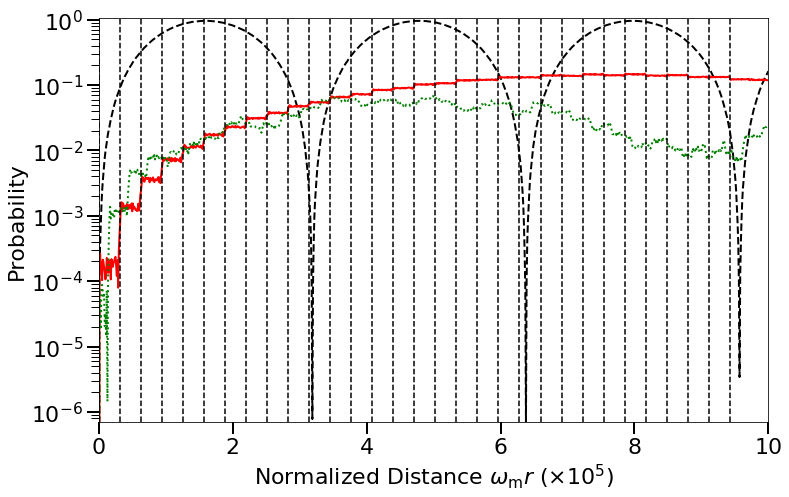

In [32]:
# "../../ipynb/papers/assets/rabi-oscillations-energy-gap-change/\
# interference/interference1-three-modes-k1-1-k2-0.1-a1-0.0001-a2-0.01.\
# csv"

# "../../ipynb/papers/assets/rabi-oscillations-energy-gap-change/\
# interference/interference2-three-modes-k1-1-k2-0.0001-a1-0.0001-a2-0.\
# 01.csv"

# "../../ipynb/papers/assets/rabi-oscillations-energy-gap-change/\
# interference/interference3-three-modes-k1-1-k2-0.0001-k3-1o1000Pi-a1-0.0001-a2-0.01-a3-0.01.csv"

# "../../ipynb/papers/assets/rabi-oscillations-energy-gap-change/\
# interference/interference-three-modes-interferencePyGridLines.csv"

# "../../ipynb/papers/assets/rabi-oscillations-energy-gap-change/\
# interference/interference-three-modes-interferencePyUpperFrameTicks.\
# csv"


neusolinter3modes1 = np.transpose( np.genfromtxt ('interference/interference1-three-modes-k1-1-k2-0.1-a1-0.0001-a2-0.01.csv', delimiter=",") )

neusolinter3modes2 = np.transpose( np.genfromtxt ('interference/interference2-three-modes-k1-1-k2-0.0001-a1-0.0001-a2-0.01.csv', delimiter=",") )

neusolinter3modes3 = np.transpose( np.genfromtxt ('interference/interference3-three-modes-k1-1-k2-0.0001-k3-1o1000Pi-a1-0.0001-a2-0.01-a3-0.01.csv', delimiter=",") )

## Gridlines that marks the zero points of the second profile

neusolinter3modesGridLines = np.transpose( np.genfromtxt ('interference/interference-three-modes-interferencePyGridLines.csv', delimiter=",") )

inter3, inter3ax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

inter3plt = plt.semilogy(neusolinter3modes1[0][0::1],neusolinter3modes1[1][0::1],'k--',\
                         neusolinter3modes2[0][0::1],neusolinter3modes2[1][0::1],'r-',\
                         neusolinter3modes3[0][0::1],neusolinter3modes3[1][0::1],'g:',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^5$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,1000000])
inter3gridlines = neusolinter3modesGridLines[:31]
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

inter3ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
inter3ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

inter3majorLocator = MultipleLocator(200000)
inter3majorFormatter = FormatStrFormatter('%.2e')
inter3minorLocator = MultipleLocator(400000)

inter3majorLocatory = MultipleLocator(0.2)
inter3majorFormattery = FormatStrFormatter('%0.1f')
inter3minorLocatory = MultipleLocator(0.04)

inter3ax.set_yscale("log", nonposy='clip')

inter3ax.xaxis.set_major_locator(inter3majorLocator)
inter3ax.xaxis.set_major_formatter(inter3majorFormatter)

# inter3ax.yaxis.set_major_locator(inter3majorLocatory)
# inter3ax.yaxis.set_major_formatter(inter3majorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
inter3xlabels = ['', '0','2','4','6','8', '10']
inter3ax.set_xticklabels(inter3xlabels)

# for the minor ticks, use no labels; default NullFormatter
# inter3ax.xaxis.set_minor_locator(inter3minorLocator)
# inter3ax.yaxis.set_minor_locator(inter3minorLocatory)

for gridline in inter3gridlines:
    inter3ax.axvline(gridline, linestyle='--', color='k')

plt.savefig('interference-reduction-three-modes-neutrino.pdf',bbox_inches='tight')

/Users/leima/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


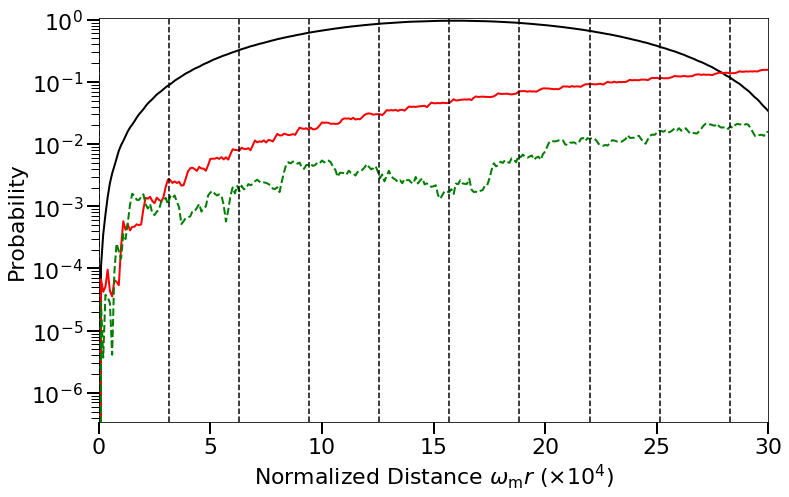

In [33]:
inter3, inter3ax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

inter3plt = plt.semilogy(solinter3modes1[0][0::1],solinter3modes1[1][0::1],'k-',\
                         solinter3modes2[0][0::1],solinter3modes2[1][0::1],'r-',\
                         solinter3modes3[0][0::1],solinter3modes3[1][0::1],'g--',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,300000])
inter3gridlines = solinter3modesGridLines[:31]
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

inter3ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
inter3ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

inter3majorLocator = MultipleLocator(50000)
inter3majorFormatter = FormatStrFormatter('%.2e')
inter3minorLocator = MultipleLocator(10000)

inter3majorLocatory = MultipleLocator(0.2)
inter3majorFormattery = FormatStrFormatter('%0.1f')
inter3minorLocatory = MultipleLocator(0.04)

inter3ax.set_yscale("log", nonposy='clip')

inter3ax.xaxis.set_major_locator(inter3majorLocator)
inter3ax.xaxis.set_major_formatter(inter3majorFormatter)

# inter3ax.yaxis.set_major_locator(inter3majorLocatory)
# inter3ax.yaxis.set_major_formatter(inter3majorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
inter3xlabels = ['', '0','5','10','15','20', '25', '30']
inter3ax.set_xticklabels(inter3xlabels)

# for the minor ticks, use no labels; default NullFormatter
# inter3ax.xaxis.set_minor_locator(inter3minorLocator)
# inter3ax.yaxis.set_minor_locator(inter3minorLocatory)

for gridline in inter3gridlines:
    inter3ax.axvline(gridline, linestyle='--', color='k')

plt.savefig('intererence-reduction-three-modes.pdf',bbox_inches='tight')

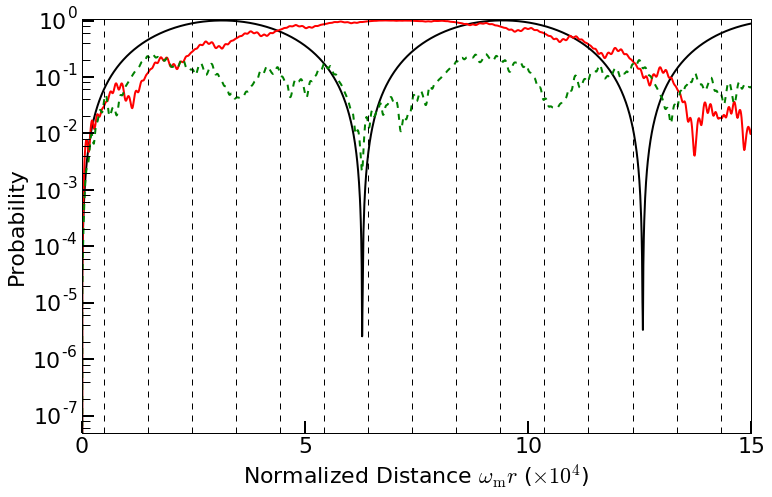

In [34]:
inter3, inter3ax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

inter3plt = plt.semilogy(solinter3modesRabi0[0][0::1],solinter3modesRabi0[1][0::1],'k-',\
                         solinter3modesRabi2[0][0::1],solinter3modesRabi2[1][0::1],'r-',\
                         solinter3modesRabi3[0][0::1],solinter3modesRabi3[1][0::1],'g--',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,150000])
inter3gridlines = solinter3modesGridLinesRabiZeros[:31]
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

inter3ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
inter3ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

inter3majorLocator = MultipleLocator(50000)
inter3majorFormatter = FormatStrFormatter('%.2e')
inter3minorLocator = MultipleLocator(10000)

inter3majorLocatory = MultipleLocator(0.2)
inter3majorFormattery = FormatStrFormatter('%0.1f')
inter3minorLocatory = MultipleLocator(0.04)

inter3ax.set_yscale("log", nonposy='clip')

inter3ax.xaxis.set_major_locator(inter3majorLocator)
inter3ax.xaxis.set_major_formatter(inter3majorFormatter)

# inter3ax.yaxis.set_major_locator(inter3majorLocatory)
# inter3ax.yaxis.set_major_formatter(inter3majorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
inter3xlabels = ['', '0','5','10','15','20', '25', '30']
inter3ax.set_xticklabels(inter3xlabels)

# for the minor ticks, use no labels; default NullFormatter
# inter3ax.xaxis.set_minor_locator(inter3minorLocator)
# inter3ax.yaxis.set_minor_locator(inter3minorLocatory)

for gridline in inter3gridlines:
    inter3ax.axvline(gridline, linestyle='--', color='k')

plt.savefig('interference-reduction-three-modes-rabi.pdf',bbox_inches='tight')

In [ ]:
inter3, inter3ax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

inter3plt = plt.semilogy(solinter3modesRabi0[0][0::1],solinter3modesRabi0[1][0::1],'k-',\
                         solinter3modesRabi2[0][0::1],solinter3modesRabi2[1][0::1],'r-',\
                         solinter3modesRabi3[0][0::1],solinter3modesRabi3[1][0::1],'g--',\
                         markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,150000])
inter3gridlines = solinter3modesGridLinesRabiZeros[:31]
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

inter3ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
inter3ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

inter3majorLocator = MultipleLocator(50000)
inter3majorFormatter = FormatStrFormatter('%.2e')
inter3minorLocator = MultipleLocator(10000)

inter3majorLocatory = MultipleLocator(0.2)
inter3majorFormattery = FormatStrFormatter('%0.1f')
inter3minorLocatory = MultipleLocator(0.04)

inter3ax.set_yscale("log", nonposy='clip')

inter3ax.xaxis.set_major_locator(inter3majorLocator)
inter3ax.xaxis.set_major_formatter(inter3majorFormatter)

# inter3ax.yaxis.set_major_locator(inter3majorLocatory)
# inter3ax.yaxis.set_major_formatter(inter3majorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
inter3xlabels = ['', '0','5','10','15','20', '25', '30']
inter3ax.set_xticklabels(inter3xlabels)

# for the minor ticks, use no labels; default NullFormatter
# inter3ax.xaxis.set_minor_locator(inter3minorLocator)
# inter3ax.yaxis.set_minor_locator(inter3minorLocatory)

for gridline in inter3gridlines:
    inter3ax.axvline(gridline, linestyle='--', color='k')

plt.savefig('interference-reduction-three-modes-rabi.pdf',bbox_inches='tight')